In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [12]:
# Read in the image
img = cv2.imread('/home/rahul/Udacity-Computer-Vision-Nanodegree/Part 1- Introduction to Computer Vision/1_1_Image_Representation/images/pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image datatype is:', type(img), 'and image shape is : ',img.shape)

This image datatype is: <class 'numpy.ndarray'> and image shape is :  (514, 816, 3)


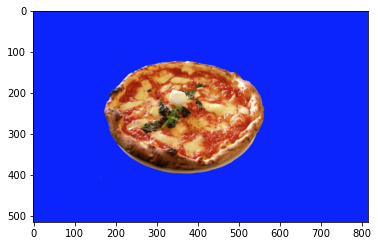

In [13]:
#convert the image from opencv BGR to RGB colorspace
img_clone = img.copy()

img_clone = cv2.cvtColor(img_clone, cv2.COLOR_BGR2RGB)
plt.imshow(img_clone)

In [14]:
#define color threshold
## TODO: Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background

lower_blue = np.array([0,0,220]) 
upper_blue = np.array([250,250,255])

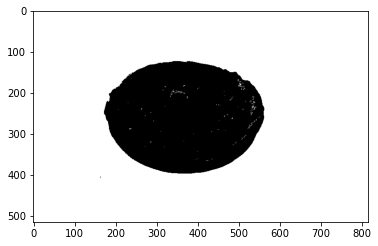

In [19]:
#define mask in image
mask_image = img_clone.copy()

mask_image = cv2.inRange(mask_image, lower_blue, upper_blue)
plt.imshow(mask_image, cmap='gray') # show masked image in gray scale

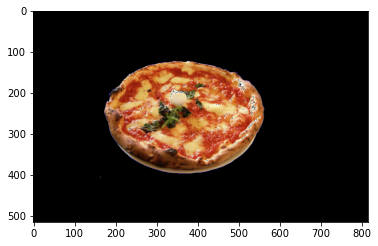

In [20]:
# Mask the image to let the pizza show through
masked_image = np.copy(img_clone)

masked_image[mask_image != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

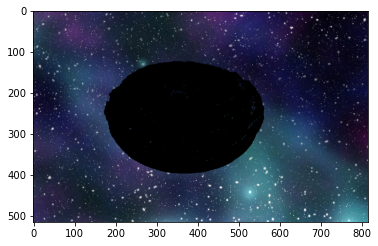

In [22]:
#mask and add background
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('/home/rahul/Udacity-Computer-Vision-Nanodegree/Part 1- Introduction to Computer Vision/1_1_Image_Representation/images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask_image == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

In [ ]:
#create a complete image
final_image = crop_background + masked_image
plt.imshow(final_image)